In [ ]:
import pandas as pd

# Import the CSV file into a pandas DataFrame
df = pd.read_csv("mf_3.csv")

# Count the number of rows
num_rows = len(df)

# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Print the results
print(f"Number of rows: {num_rows}")
print("\nNumber of missing values in each column:")
print(missing_values)


Number of rows: 558503

Number of missing values in each column:
participantID          0
age                    0
nativeLanguage     22589
gender                 0
education              0
city              151631
country             2538
responseID             0
section                0
cue                    0
R1                    63
R2                    58
R3                    76
dtype: int64


In [ ]:
df.head(10)

,participantID,age,nativeLanguage,gender,education,city,country,responseID,section,cue,R1,R2,R3
0,12,28,URU_R,Fe,4,Montevideo,Uruguay,128,set_2013,bar,abierto,cerveza,noche
1,12,28,URU_R,Fe,4,Montevideo,Uruguay,129,set_2013,tren,expreso,nocturno,bala
2,12,28,URU_R,Fe,4,Montevideo,Uruguay,130,set_2013,mano,libre,derecha,hermano
3,12,28,URU_R,Fe,4,Montevideo,Uruguay,131,set_2013,sopa,fría,Mafalda,verde
4,12,28,URU_R,Fe,4,Montevideo,Uruguay,132,set_2013,especie,ave,Darwin,extinción
5,12,28,URU_R,Fe,4,Montevideo,Uruguay,133,set_2013,mina,linda,minero,carbón
6,12,28,URU_R,Fe,4,Montevideo,Uruguay,134,set_2013,asco,puaj,Freud,feo
7,12,28,URU_R,Fe,4,Montevideo,Uruguay,135,set_2013,gana,pierde,partido,festeja
8,12,28,URU_R,Fe,4,Montevideo,Uruguay,136,set_2013,venta,compra,garage,mercado
9,12,28,URU_R,Fe,4,Montevideo,Uruguay,137,set_2013,iglesia,fuego,cruz,cura


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler  # Use this for feature scaling
#Handling Missing Data
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Impute missing values (replace NaN values with the mean for numerical columns)
imputer = SimpleImputer(strategy="mean")
numerical_cols = df.select_dtypes(include="number").columns
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

Missing Values:
 participantID          0
age                    0
nativeLanguage     22589
gender                 0
education              0
city              151631
country             2538
responseID             0
section                0
cue                    0
R1                    63
R2                    58
R3                    76
dtype: int64


In [ ]:
# Encoding Categorical Variables
# Use label encoding for ordinal categorical variables
label_encoder = LabelEncoder()
ordinal_cols = ['education']  # Add all ordinal categorical columns
for col in ordinal_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Use one-hot encoding for nominal categorical variables
nominal_cols = ['nativeLanguage', 'gender', 'city', 'country']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Scaling Numerical Features (if necessary)
# Use this step if you have numerical features with different scales
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Now, your dataset is preprocessed and ready for model building.
# You can proceed to split the data and train your predictive model.


In [ ]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y)
X = df.drop(columns=['R1'])  # Replace 'R1' with the target variable you want to predict
y = df['R1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Explanation:
# - 'X' should contain your feature columns (independent variables).
# - 'y' should contain the target variable (dependent variable).
# - test_size specifies the proportion of the data to be used for testing (e.g., 0.2 for a 20% test set).
# - random_state sets a seed for random number generation, ensuring reproducibility.

# Now you have X_train, X_test, y_train, and y_test to train and evaluate your model.

In [ ]:
summary_stats = df.describe()
print(summary_stats)


       participantID           age     education    responseID  \
count   5.585030e+05  5.585030e+05  5.585030e+05  5.585030e+05   
mean    2.011137e-16  8.162610e-17  1.027960e-17 -1.221338e-16   
std     1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min    -1.714686e+00 -2.169271e+00 -3.923293e+00 -1.738550e+00   
25%    -8.598300e-01 -8.464164e-01 -9.643644e-01 -8.644060e-01   
50%    -1.588240e-02 -1.849889e-01  5.150998e-01  6.915248e-04   
75%     8.394622e-01  7.410097e-01  5.150998e-01  8.657891e-01   
max     1.809021e+00  4.048147e+00  1.994564e+00  1.732981e+00   

       nativeLanguage_ARG_N  nativeLanguage_ARG_R  nativeLanguage_URU_R  \
count         558503.000000         558503.000000         558503.000000   
mean               0.005608              0.318655              0.624688   
std                0.074675              0.465955              0.484204   
min                0.000000              0.000000              0.000000   
25%                0.000000   

In [ ]:
class_distribution = df['R1'].value_counts()
class_distribution

No conozco la palabra                    25475
agua                                      2522
comida                                    2336
amor                                      2025
trabajo                                   1813
                                         ...  
festejar. reunión alegre                     1
parte exterior de los árboles leñosos        1
cuerpo mundano                               1
polla                                        1
asentimiento                                 1
Name: R1, Length: 60762, dtype: int64

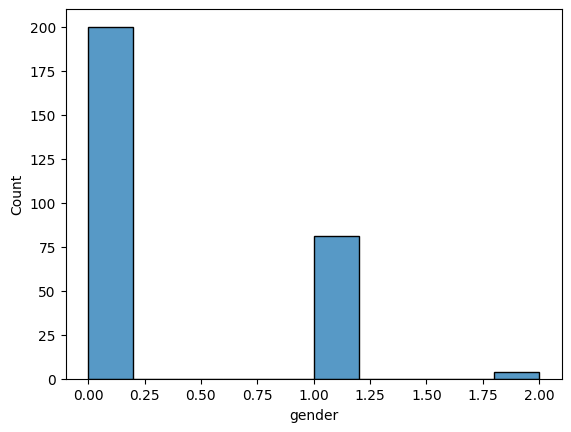

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of 'gender'
sns.histplot(df['gender'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

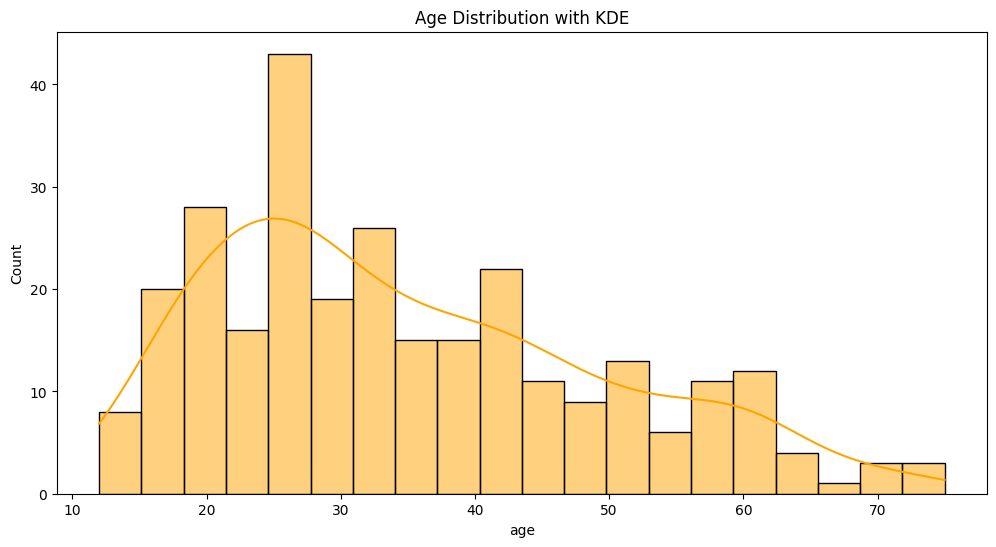

In [3]:
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], kde=True, color='orange', bins=20)
plt.title("Age Distribution with KDE")

plt.show

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv("mf_3.csv")

# Convert 'R1' to a numeric data type
df['R1'] = pd.to_numeric(df['R1'], errors='coerce')

# Remove NaN values from 'R1'
df = df.dropna(subset=['R1'])

# Specify categorical columns
categorical_columns = ['nativeLanguage', 'gender', 'education', 'city', 'country', 'section', 'cue']

# Label Encoding for categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Data Splitting
target_column = 'R1'  # Specify your target variable column
X = df.drop(columns=[target_column, 'R2', 'R3'])  # Features (excluding 'R2' and 'R3')
y = df[target_column]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Model Evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print results for Linear Regression
print("Linear Regression Results:")
print("Mean Squared Error (MSE):", mse_linear)
print("R-squared (R2):", r2_linear)


# Statistical Analysis (Hypothesis Testing)
X_train_with_intercept = sm.add_constant(X_train)
regressor_ols = sm.OLS(y_train, X_train_with_intercept).fit()
hypothesis_test_result = regressor_ols.summary()

# Print results
print("Hypothesis Testing Results:")
print(hypothesis_test_result)


<ipython-input-1-67691d5e2dc4>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-1-67691d5e2dc4>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-1-67691d5e2dc4>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

Linear Regression Results:
Mean Squared Error (MSE): 2174106544720.935
R-squared (R2): -31747864.107767776
Hypothesis Testing Results:
                            OLS Regression Results                            
Dep. Variable:                     R1   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.088
Date:                Sat, 02 Dec 2023   Prob (F-statistic):              0.373
Time:                        15:15:12   Log-Likelihood:                -3922.4
No. Observations:                 228   AIC:                             7867.
Df Residuals:                     217   BIC:                             7905.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025     